In [10]:
# Regresión lineal
import yfinance as yf 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Descargar datos del futuro del Nasdaq 
df = yf.download('NQ=F', start='2020-01-01', end='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [12]:
# Crear la variable independiente (Dias) y la dependiente (cierre)
df['Dias'] = (df.index - df.index[0]).days # Crear columna 'Dias' a partir de la fecha
X = df[['Dias']] # Variable independiente
Y = df['Close'] # Variable dependiente (Precio de cierre)
df

Price,Adj Close,Close,High,Low,Open,Volume,Dias
Ticker,NQ=F,NQ=F,NQ=F,NQ=F,NQ=F,NQ=F,
Date,,,,,,,
2020-01-02 00:00:00+00:00,8891.75,8891.75,8901.50,8769.50,8776.75,416637,0
2020-01-03 00:00:00+00:00,8810.00,8810.00,8907.25,8735.25,8895.50,599887,1
2020-01-06 00:00:00+00:00,8847.50,8847.50,8873.00,8723.00,8772.25,469514,4
2020-01-07 00:00:00+00:00,8853.00,8853.00,8894.75,8825.75,8853.25,510004,5
2020-01-08 00:00:00+00:00,8944.50,8944.50,8972.25,8678.00,8841.50,723085,6
...,...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,12704.50,12704.50,12724.00,12631.50,12660.75,173464,357
2020-12-28 00:00:00+00:00,12832.75,12832.75,12855.50,12655.25,12676.25,346691,361


In [13]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [14]:
# Crear y ajustar el modelo de regresion lineal
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

LinearRegression()

In [15]:
# Hacer predicciones sobre el conjunto de prubea
predicciones = modelo.predict(X_test)

In [16]:
# Evaluar el modelo
mse = mean_squared_error(Y_test, predicciones)
r2 = r2_score(Y_test, predicciones)
# Mostrar resultados
print(f'Error Cuadrático Medio: {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')


Error Cuadrático Medio: 387225.1427537994
Coeficiente de Determinación (R^2): 0.8193668502692162


In [17]:
# Mostrar primeras filas con predicciones
df['Prediccion'] = modelo.predict(X)
print(df[['Close', 'Prediccion']].head())


Price                        Close   Prediccion
Ticker                        NQ=F             
Date                                           
2020-01-02 00:00:00+00:00  8891.75  7966.711578
2020-01-03 00:00:00+00:00  8810.00  7979.352405
2020-01-06 00:00:00+00:00  8847.50  8017.274885
2020-01-07 00:00:00+00:00  8853.00  8029.915712
2020-01-08 00:00:00+00:00  8944.50  8042.556539


<Axes: xlabel='Date'>

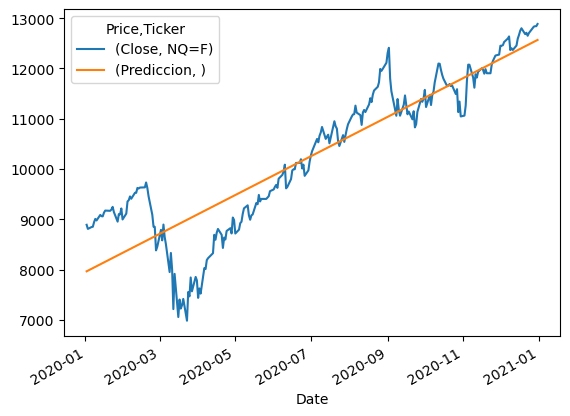

In [18]:
df[['Close', 'Prediccion']].plot()